<a href="https://colab.research.google.com/github/LatifaAlnaim1996/ML/blob/main/AssighnmentDay4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN Assighnment , Latifa ALnaim **


---



# **Adult Dataset Classification**

# Your data has already been split into training and testing sets, do not use train_test_split
# Only use your training set for EDA, Cleaning, Modeling, etc.
# You will have to perform the same transformations on your test set that you apply to your training set. The column names are exactly the same as your training set.
# DO NOT look into your test set until you are ready to test the accuracy of your model. Your test set is supposed to represent unseen data and lets treat it that way until we are ready to test our accuracy. Your transformations on your training set should work on your test set since it has the exact same column names and the values are exactly the same.


# **Import Data**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


from matplotlib import pyplot
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

d = {' <=50K': 0, ' >50K': 1}
training['target']=training['target'].map(d).fillna(training['target'])

d = {' <=50K.': 0, ' >50K.': 1}
test['target']=test['target'].map(d).fillna(test['target'])
X_train = training.drop("target", axis=1)
y_train = training["target"] 
X_test = test.drop("target", axis=1)
y_test = test["target"]

In [ ]:
training.sample(15)


,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target
29372,42,Private,22831,HS-grad,9,Never-married,Other-service,Not-in-family,Female,0,0,40,United-States,0
3647,53,Private,166386,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Wife,Female,0,0,40,China,0
24742,24,State-gov,197731,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Male,0,0,49,United-States,1
17688,47,Private,103020,7th-8th,4,Married-civ-spouse,Machine-op-inspct,Wife,Female,0,0,40,Puerto-Rico,0
12165,39,Self-emp-not-inc,230329,Some-college,10,Never-married,Prof-specialty,Not-in-family,Male,0,1564,12,United-States,1
20904,20,Private,194630,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Male,3781,0,50,United-States,0
10508,45,Private,191858,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,45,United-States,1
8277,43,Private,209149,HS-grad,9,Divorced,Other-service,Not-in-family,Female,0,0,35,United-States,0
6053,22,Private,203240,10th,6,Never-married,Adm-clerical,Not-in-family,Female,0,0,40,United-States,0
29614,25,?,219897,Masters,14,Never-married,?,Not-in-family,Female,0,0,35,Canada,0


# **About the DATA :**

In [ ]:
test['target'].unique()

array([0, 1])

In [ ]:
training.target.value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: target, Length: 32561, dtype: int64>

In [ ]:

test.sample(15)

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target
3390,55,Private,204816,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,United-States,1
7070,33,Private,44623,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,0
13220,49,Private,28171,HS-grad,9,Divorced,Tech-support,Not-in-family,Male,4787,0,40,United-States,1
9170,54,Private,145419,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States,1
8893,47,Private,209146,Masters,14,Divorced,Sales,Not-in-family,Male,27828,0,40,United-States,1
14034,27,Without-pay,35034,HS-grad,9,Never-married,Farming-fishing,Own-child,Female,0,0,40,United-States,0
1137,24,Private,219140,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Male,0,0,40,United-States,0
4763,57,Private,224174,Assoc-voc,11,Widowed,Craft-repair,Not-in-family,Male,0,0,40,?,0
8024,32,Private,134679,11th,7,Never-married,Handlers-cleaners,Own-child,Female,0,0,40,United-States,0
14963,41,Private,43711,HS-grad,9,Never-married,Other-service,Not-in-family,Male,0,0,30,United-States,0


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   ooccupation     32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  target          32561 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


In [ ]:
training.shape

(32561, 14)

In [ ]:
training['target'].value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [ ]:
len(training['target'].loc[training['target'] =='<=50K'])

0

In [ ]:
training.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
len(training['target'])

32561

# ***Cleaning ***

In [ ]:

X_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:

y_train.isna().sum()

0

In [ ]:
X_train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
dummtest = pd.get_dummies(data=test)
dummtest

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,ooccupation_ ?,...,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16277,64,321403,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16278,38,374983,13,0,0,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16279,44,83891,13,5455,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# **Visualizing data**

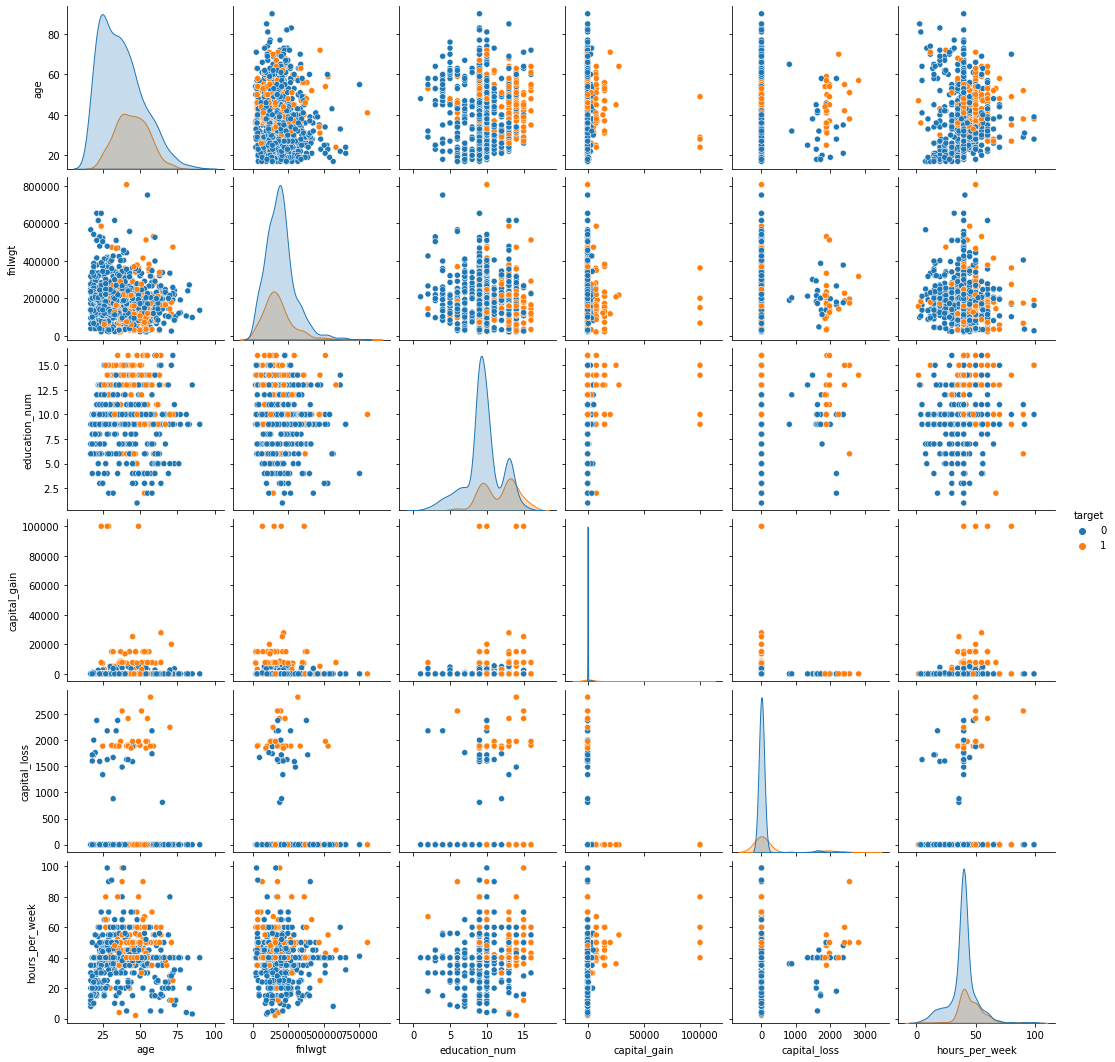

In [ ]:
import seaborn as sns
sns.pairplot(training.sample(1000), hue='target')

In [ ]:
corr = training.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
target,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


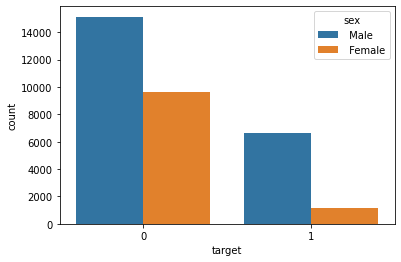

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(x='target', hue='sex', data=training)

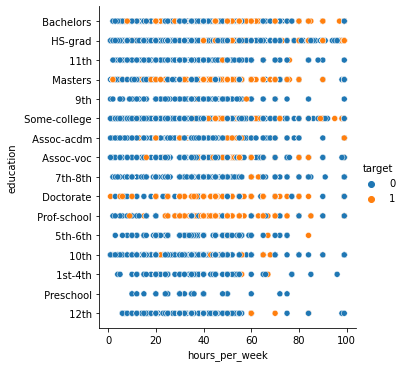

In [ ]:
sns.color_palette("crest", as_cmap=True)
sns.relplot(x="hours_per_week", y="education",hue="target",data=training)

# **BaseLine & KNN Models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
X_test

,age,hours_per_week
0,25,40
1,38,50
2,28,40
3,44,40
4,18,30
...,...,...
16276,39,36
16277,64,40
16278,38,50
16279,44,40


In [ ]:
knn_pred=knn.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn_score =accuracy_score(y_test, knn.predict(X_test))
knn_score

0.7285179043056323

# **COMPARING  :**

In [ ]:

bl_score - knn_score

In [ ]:
bl_score > knn_score

NameError: ignored

**I think the BL model ( BaseLine) shows better result. Since the accuracy score for BL is higher than KNN accuracy score.**

---

---

---





